In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from src.calibration import *
from src.transform import *

calibration = Calibration('camera_cal/', (9, 6))
transform = Transform()

In [2]:
def plot_channels(dict, title, nrows=1, ncols=3, figsize=(12, 3)):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axs = axs.flatten()
    for channel, ax in zip(dict, axs):
        ax.imshow(dict[channel], cmap='gray')
        ax.title.set_text(channel)
        ax.axis(False)
    fig.suptitle(title)
    plt.show()

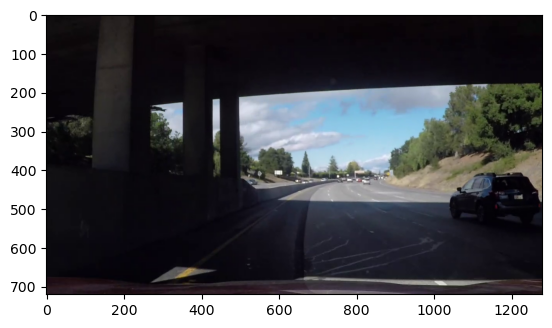

In [3]:
orig_img = cv2.imread('output_media/debug/problem_frames/132_frame.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
plt.imshow(orig_img)

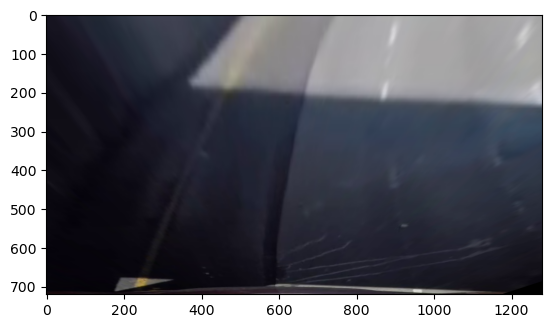

In [4]:
img = calibration.undistort(np.copy(orig_img))
img = transform.orig_to_bev(img)
plt.imshow(img)

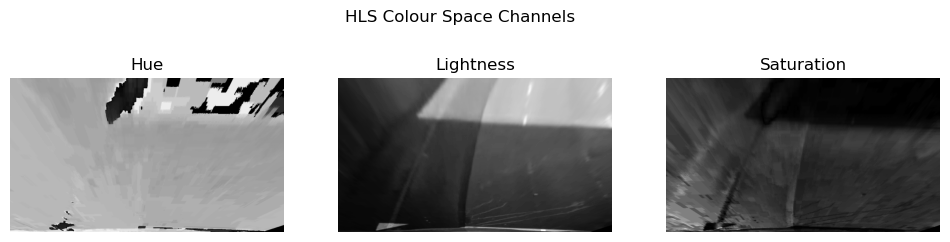

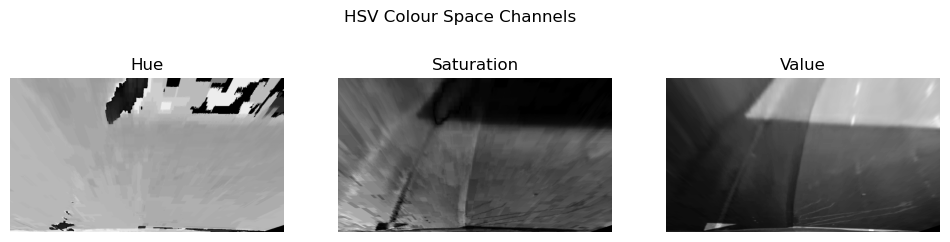

In [5]:
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

hls_dict = {
    'Hue' : hls[:,:,0],
    'Lightness' : hls[:,:,1],
    'Saturation' : hls[:,:,2]
}

hsv_dict = {
    'Hue' : hsv[:,:,0],
    'Saturation' : hsv[:,:,1],
    'Value' : hsv[:,:,2]
}

plot_channels(hls_dict, title='HLS Colour Space Channels')
plot_channels(hsv_dict, title='HSV Colour Space Channels')

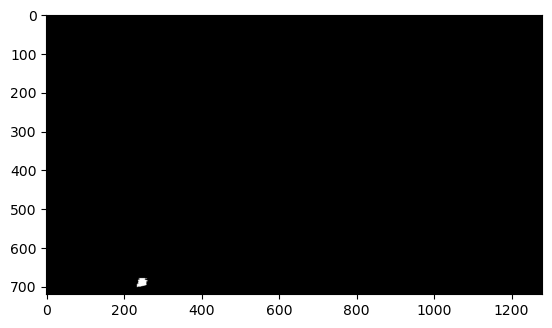

In [6]:
yellow_lower_range = np.array([0, 100, 100])
yellow_upper_range = np.array([50, 255, 255])

yellow = cv2.inRange(hsv, yellow_lower_range, yellow_upper_range)

plt.imshow(yellow, cmap='gray')

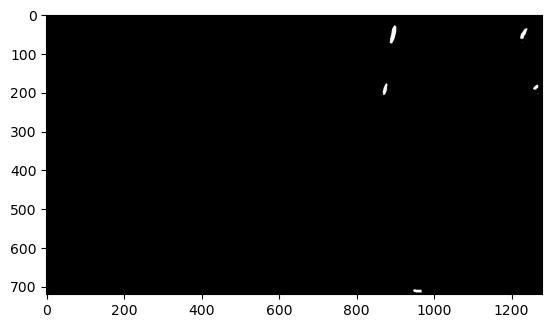

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
white_lower_range = np.array([200])
white_upper_range = np.array([255])

white = cv2.inRange(gray, white_lower_range, white_upper_range)
plt.imshow(white, cmap='gray')

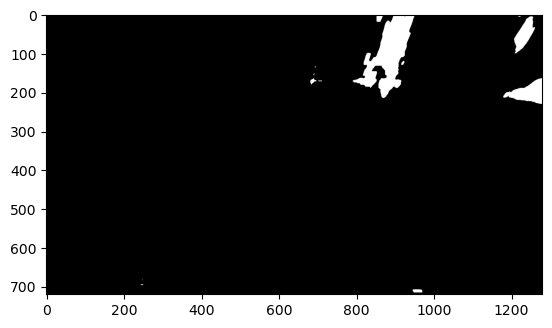

In [8]:
v_channel = hsv_dict['Value']
v_channel_lower_range = np.array([175])
v_channel_upper_range = np.array([255])

value = cv2.inRange(v_channel, v_channel_lower_range, v_channel_upper_range)
plt.imshow(value, cmap='gray')

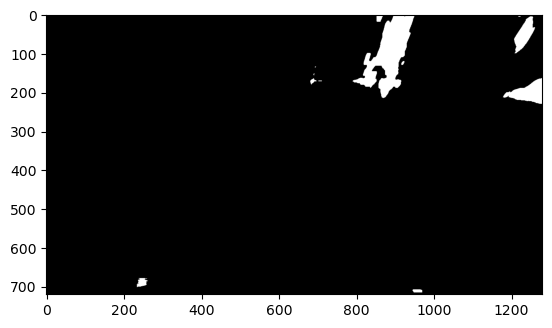

In [12]:
plt.imshow(yellow | white | value, cmap='gray')

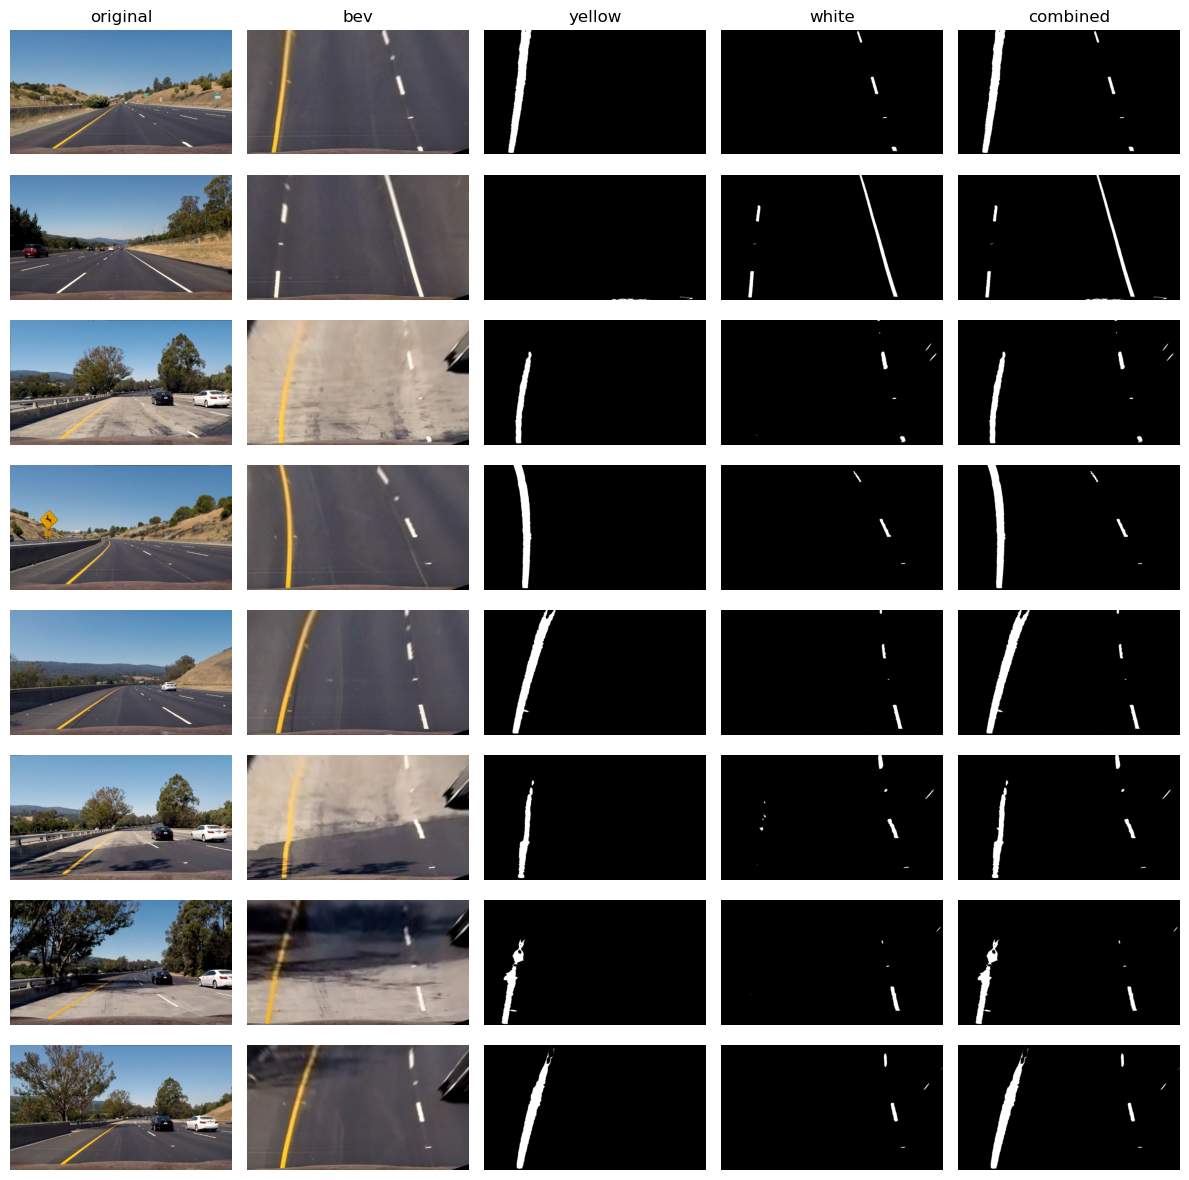

In [10]:
# Specify yellow threshold range
yellow_lower_range = np.array([0, 100, 100])
yellow_upper_range = np.array([50, 255, 255])

# Specify white threshold range
white_lower_range = np.array([215])
white_upper_range = np.array([255])

# Get file names
fnames = glob("{}/*".format('test_images/'))

# Create dict to store images
dict = dict.fromkeys(['original', 'bev', 'yellow', 'white', 'combined'])

# Define subplot parameters
nrows = len(fnames)
ncols = len(dict)

# Create figure
fig, axs = plt.subplots(nrows, ncols, figsize=(12,12))

# Set title of each column
for ax, col in zip(axs[0], dict.keys()):
    ax.set_title(col)

# Iterate through images and generate threshold images
for row, file in enumerate(fnames):
    # Read in image
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dict['original'] = img

    img = calibration.undistort(img)
    img = transform.orig_to_bev(img)
    dict['bev'] = img

    # Get colour spaces
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply colour-specific thresholding
    dict['yellow'] = cv2.inRange(hsv, yellow_lower_range, yellow_upper_range)
    dict['white'] = cv2.inRange(gray, white_lower_range, white_upper_range)

    # Combine threshold channels
    dict['combined'] = dict['yellow'] | dict['white']

    for col, (title, img) in enumerate(dict.items()):
        if title in ['original', 'bev']:
            axs[row, col].imshow(img)
        else:
            axs[row, col].imshow(img, cmap='gray')
        axs[row, col].axis(False)

fig.tight_layout()
plt.show()
